In [7]:
pacman::p_load(oce,ggplot2,dplyr,cowplot,ocedata,tidyr,
               data.table,dplyr,ggplot2,reshape2,RColorBrewer,viridis,cowplot,lubridate,
               comprehenr,UpSetR,ape,"ggrepel", "ggspatial", "libwgeom", "sf",
               "rnaturalearth", "rnaturalearthdata","rgeos")

Warning message in utils::install.packages(package, ...):
“installation of package ‘reshape2’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape2’”
Warning message:
“package ‘libwgeom’ is not available (for R version 3.6.1)”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘libwgeom’”
Warning message in pacman::p_load(oce, ggplot2, dplyr, cowplot, ocedata, tidyr, :
“Failed to install/load:
reshape2, libwgeom”


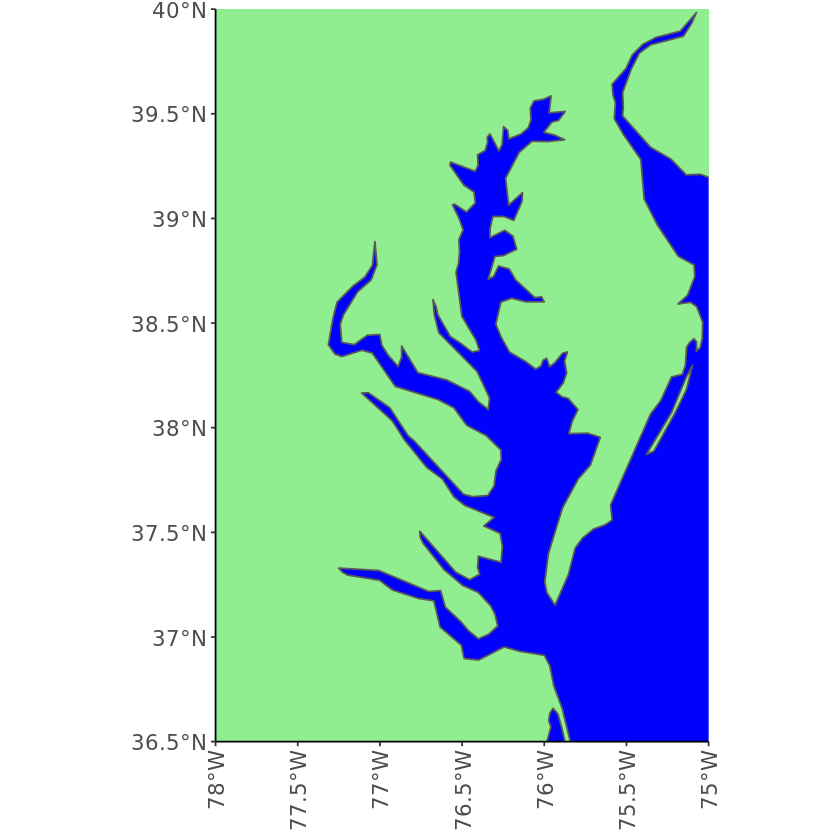

In [27]:
world <- ne_countries(scale = "medium", returnclass = "sf")

bigmap = ggplot(data = world) +
    geom_sf(fill="light green") +
    theme(panel.background = element_rect(fill="blue")) + 
    theme(panel.border = element_blank(),
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.line = element_line(size = 0.5, linetype = "solid",
                                   colour = "black")) + 
    coord_sf(ylim = c(36.5, 40), xlim = c(-78,-75), expand = FALSE) + 
    theme(text = element_text(size=16),
         axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

ggdraw() +
  draw_plot(bigmap) 
ggsave("ChesBayMap.png",width=6,height=8,units="in")

In [25]:
bluecrab_dir = file.path("..","output")
bluecrab_files = list.files(bluecrab_dir)
bluecrab_files

[1] "climatechangetemps__28Dec20_slurm_finaltemponly_10000.csv"  
 [2] "climatechangetemps__28Dec20_slurm_finaltemponly_20000.csv"  
 [3] "climatechangetemps__28Dec20_slurm_finaltemponly_30000.csv"  
 [4] "climatechangetemps__28Dec20_slurm_finaltemponly_5000.csv"   
 [5] "climatechangetemps__30Oct20_slurm_finaltemponly_10000.csv"  
 [6] "climatechangetemps__30Oct20_slurm_finaltemponly_5000.csv"   
 [7] "climatechangetemps__30Oct20_slurm_finaltemponly_50000.csv"  
 [8] "climatechangetemps_28Dec20_slurm_finalsaltonly_10000.csv"   
 [9] "climatechangetemps_28Dec20_slurm_finalsaltonly_5000.csv"    
[10] "climatechangetemps_28Dec20_slurm_finaltempandsalt_10000.csv"
[11] "climatechangetemps_28Dec20_slurm_finaltempandsalt_20000.csv"
[12] "climatechangetemps_28Dec20_slurm_finaltempandsalt_5000.csv" 
[13] "climatechangetemps_30Oct20_slurm_finalsaltonly_10000.csv"   
[14] "climatechangetemps_30Oct20_slurm_finalsaltonly_5000.csv"    
[15] "climatechangetemps_30Oct20_slurm_finalsaltonly_50000.csv"   
[16] "climatechangetemps_30Oct20_slurm_finaltempandsalt_10000.csv"
[17] "climatechangetemps_30Oct20_slurm_finaltempandsalt_5000.csv" 
[18] "climatechangetemps_30Oct20_slurm_finaltempandsalt_50000.csv"
[19] "normaltruncatedtemps_28Dec20_slurm_final_10000.csv"         
[20] "normaltruncatedtemps_28Dec20_slurm_final_20000.csv"         
[21] "normaltruncatedtemps_28Dec20_slurm_final_5000.csv"          
[22] "normaltruncatedtemps_30Oct20_slurm_final_10000.csv"         
[23] "normaltruncatedtemps_30Oct20_slurm_final_5000.csv"          
[24] "normaltruncatedtemps_30Oct20_slurm_final_50000.csv"

In [26]:
bluecrab_data = data.frame(fread(file.path(bluecrab_dir,bluecrab_files[1])))
head(bluecrab_data)

,id,pos,temp,simTime,age,sex,mated,eggs,size,numSperm,degreeDays,tOpt,lifespan,step,replicate
,<int>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,"(70, 40)",5.492176,0,0,0,0,0,3,0,0,25,760,0,1
2,2,"(45, 17)",7.008911,0,266,0,1,44,22,22,7,21,1032,0,1
3,3,"(33, 118)",1.251981,0,692,1,0,14,7,7,1,23,1032,0,1
4,4,"(42, 28)",6.506995,0,4,0,1,36,18,18,23,26,682,0,1
5,5,"(44, 106)",6.503712,0,28,0,0,36,18,18,7,21,1016,0,1
6,6,"(72, 41)",4.871208,0,108,1,0,20,10,10,4,25,911,0,1


In [27]:
bc_grouped = bluecrab_data %>% dplyr::group_by(simTime,pos) %>% dplyr::summarize(CountCrabs = n())
bc_grouped$lon = unlist(lapply(bc_grouped$pos,strsplit,", "))[seq(1,2*nrow(bc_grouped),
                                                                  length.out = nrow(bc_grouped))]
bc_grouped$lat = unlist(lapply(bc_grouped$pos,strsplit,", "))[seq(2,2*nrow(bc_grouped),
                                                                  length.out = nrow(bc_grouped))]
for (i in seq(1,nrow(bc_grouped))) {
    bc_grouped$lat[i] = gsub("[()]","",bc_grouped$lat[i])
    bc_grouped$lon[i] = gsub("[()]","",bc_grouped$lon[i])
}

`summarise()` regrouping output by 'simTime' (override with `.groups` argument)



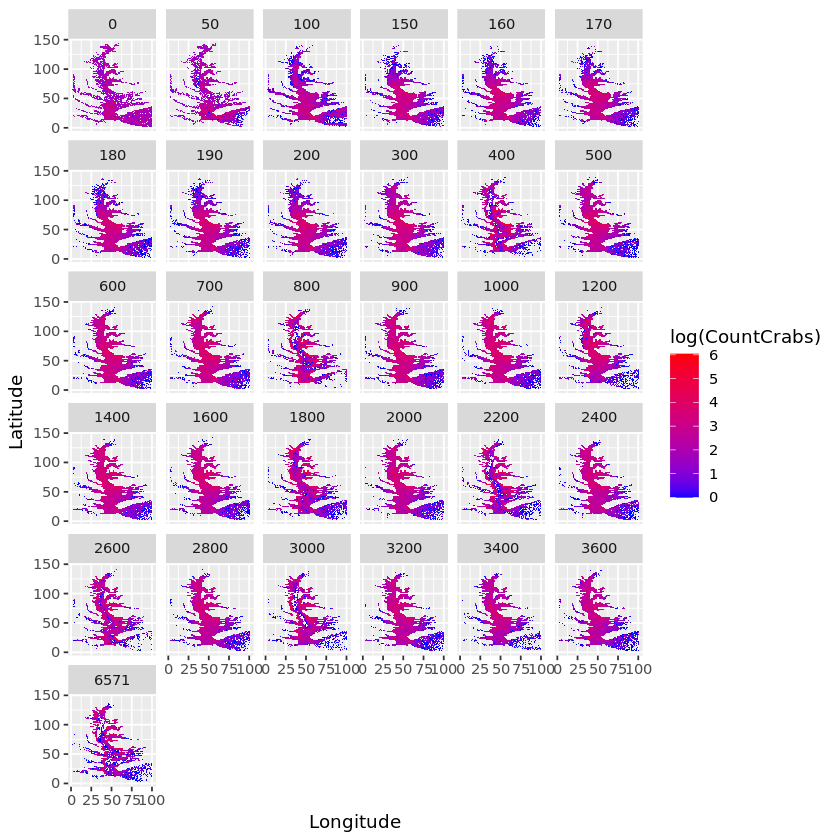

In [38]:
ggplot(bc_grouped) + geom_tile(aes(x = as.numeric(as.character(lon)), 
                                   y = as.numeric(as.character(lat)), 
                                   fill = log(CountCrabs))) + 
   facet_wrap(~simTime) + xlab("Longitude") + ylab("Latitude") + 
   scale_fill_gradient(high="red",low="blue")

In [42]:
bc_grouped = bluecrab_data %>% dplyr::group_by(simTime,pos) %>% dplyr::summarize(CountCrabs = n(),
                                                                                 MeanAge = mean(age))
bc_grouped$lon = unlist(lapply(bc_grouped$pos,strsplit,", "))[seq(1,2*nrow(bc_grouped),
                                                                  length.out = nrow(bc_grouped))]
bc_grouped$lat = unlist(lapply(bc_grouped$pos,strsplit,", "))[seq(2,2*nrow(bc_grouped),
                                                                  length.out = nrow(bc_grouped))]
for (i in seq(1,nrow(bc_grouped))) {
    bc_grouped$lat[i] = gsub("[()]","",bc_grouped$lat[i])
    bc_grouped$lon[i] = gsub("[()]","",bc_grouped$lon[i])
}

`summarise()` regrouping output by 'simTime' (override with `.groups` argument)



In [43]:
bc_grouped

simTime,pos,CountCrabs,MeanAge,lon,lat
<int>,<chr>,<int>,<dbl>,<chr>,<chr>
0,"(10, 21)",9,349.00000,10,21
0,"(10, 30)",9,558.00000,10,30
0,"(10, 31)",6,179.50000,10,31
0,"(10, 44)",12,736.25000,10,44
0,"(10, 45)",3,39.00000,10,45
0,"(10, 46)",3,376.00000,10,46
0,"(10, 59)",3,12.00000,10,59
0,"(10, 61)",6,260.00000,10,61
0,"(10, 64)",18,373.16667,10,64


`summarise()` ungrouping output (override with `.groups` argument)



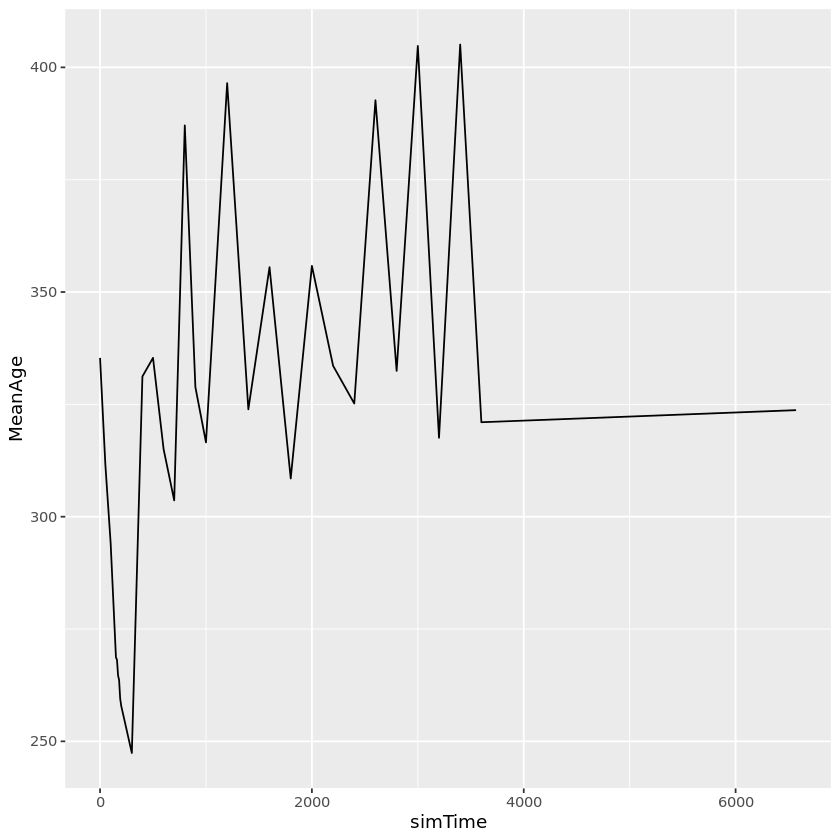

In [46]:
bc_summary = bc_grouped %>% dplyr::group_by(simTime) %>% dplyr::summarize(MeanCrabs = mean(CountCrabs),
                                                                          MeanAge = mean(MeanAge))

ggplot(bc_summary) + geom_line(aes(x = simTime, y = MeanAge))

In [ ]:
process_bc <- function(filename) {
    bluecrab_data = data.frame(fread(file.path(bluecrab_dir,filename)))
    bc_grouped = bluecrab_data %>% dplyr::group_by(simTime,pos) %>% dplyr::summarize(CountCrabs = n(),
                                                                                 MeanAge = mean(age))
    bc_grouped$lon = unlist(lapply(bc_grouped$pos,strsplit,", "))[seq(1,2*nrow(bc_grouped),
                                                                      length.out = nrow(bc_grouped))]
    bc_grouped$lat = unlist(lapply(bc_grouped$pos,strsplit,", "))[seq(2,2*nrow(bc_grouped),
                                                                      length.out = nrow(bc_grouped))]
    for (i in seq(1,nrow(bc_grouped))) {
        bc_grouped$lat[i] = gsub("[()]","",bc_grouped$lat[i])
        bc_grouped$lon[i] = gsub("[()]","",bc_grouped$lon[i])
    }
    bc_summary = bc_grouped %>% dplyr::group_by(simTime) %>% dplyr::summarize(MeanCrabs = mean(CountCrabs),
                                                                          MeanAge = mean(MeanAge),
                                                                          SumCrabs = sum(CountCrabs))
    
    return(list(bc_grouped,bc_summary))
}

facetplot_bc <- function(bc_grouped) {
    ggplot(bc_grouped) + geom_tile(aes(x = as.numeric(as.character(lon)), 
                                   y = as.numeric(as.character(lat)), 
                                   fill = log(CountCrabs))) + 
       facet_wrap(~simTime) + xlab("Longitude") + ylab("Latitude") + 
       scale_fill_gradient(high="red",low="blue")

}

In [8]:
bluecrab_dir = file.path("..","output")
bluecrab_files = list.files(bluecrab_dir)
bluecrab_files
cc_10000 = process_bc("climatechangetemps__28Dec20_slurm_finaltemponly_5000.csv")
normal_10000 = process_bc("normaltruncatedtemps_28Dec20_slurm_final_5000.csv")

[1] "climatechangetemps__28Dec20_slurm_finaltemponly_10000.csv"  
 [2] "climatechangetemps__28Dec20_slurm_finaltemponly_100000.csv" 
 [3] "climatechangetemps__28Dec20_slurm_finaltemponly_20000.csv"  
 [4] "climatechangetemps__28Dec20_slurm_finaltemponly_30000.csv"  
 [5] "climatechangetemps__28Dec20_slurm_finaltemponly_5000.csv"   
 [6] "climatechangetemps__30Oct20_slurm_finaltemponly_10000.csv"  
 [7] "climatechangetemps__30Oct20_slurm_finaltemponly_5000.csv"   
 [8] "climatechangetemps__30Oct20_slurm_finaltemponly_50000.csv"  
 [9] "climatechangetemps_28Dec20_slurm_finalsaltonly_10000.csv"   
[10] "climatechangetemps_28Dec20_slurm_finalsaltonly_20000.csv"   
[11] "climatechangetemps_28Dec20_slurm_finalsaltonly_5000.csv"    
[12] "climatechangetemps_28Dec20_slurm_finaltempandsalt_10000.csv"
[13] "climatechangetemps_28Dec20_slurm_finaltempandsalt_20000.csv"
[14] "climatechangetemps_28Dec20_slurm_finaltempandsalt_5000.csv" 
[15] "climatechangetemps_30Oct20_slurm_finalsaltonly_10000.csv"   
[16] "climatechangetemps_30Oct20_slurm_finalsaltonly_5000.csv"    
[17] "climatechangetemps_30Oct20_slurm_finalsaltonly_50000.csv"   
[18] "climatechangetemps_30Oct20_slurm_finaltempandsalt_10000.csv"
[19] "climatechangetemps_30Oct20_slurm_finaltempandsalt_5000.csv" 
[20] "climatechangetemps_30Oct20_slurm_finaltempandsalt_50000.csv"
[21] "normaltruncatedtemps_28Dec20_slurm_final_10000.csv"         
[22] "normaltruncatedtemps_28Dec20_slurm_final_20000.csv"         
[23] "normaltruncatedtemps_28Dec20_slurm_final_5000.csv"          
[24] "normaltruncatedtemps_30Oct20_slurm_final_10000.csv"         
[25] "normaltruncatedtemps_30Oct20_slurm_final_5000.csv"          
[26] "normaltruncatedtemps_30Oct20_slurm_final_50000.csv"

`summarise()` regrouping output by 'simTime' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` regrouping output by 'simTime' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



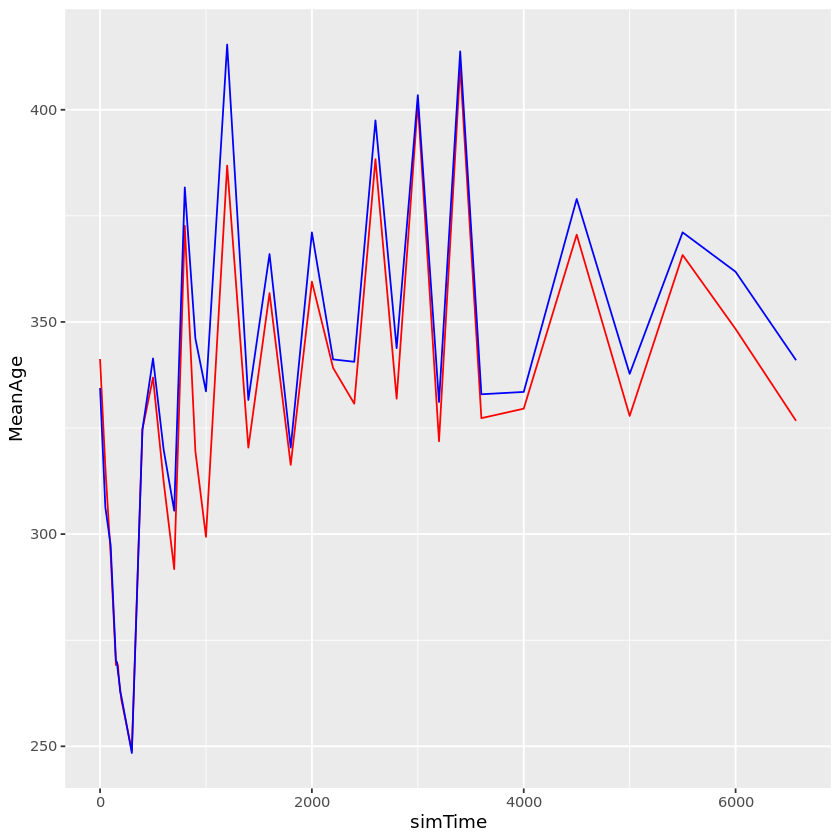

In [12]:
ggplot(cc_10000[[2]]) + geom_line(aes(x = simTime, y = MeanAge), col = "red") + 
    geom_line(data = normal_10000[[2]], aes(x = simTime, y = MeanAge), col = "blue")

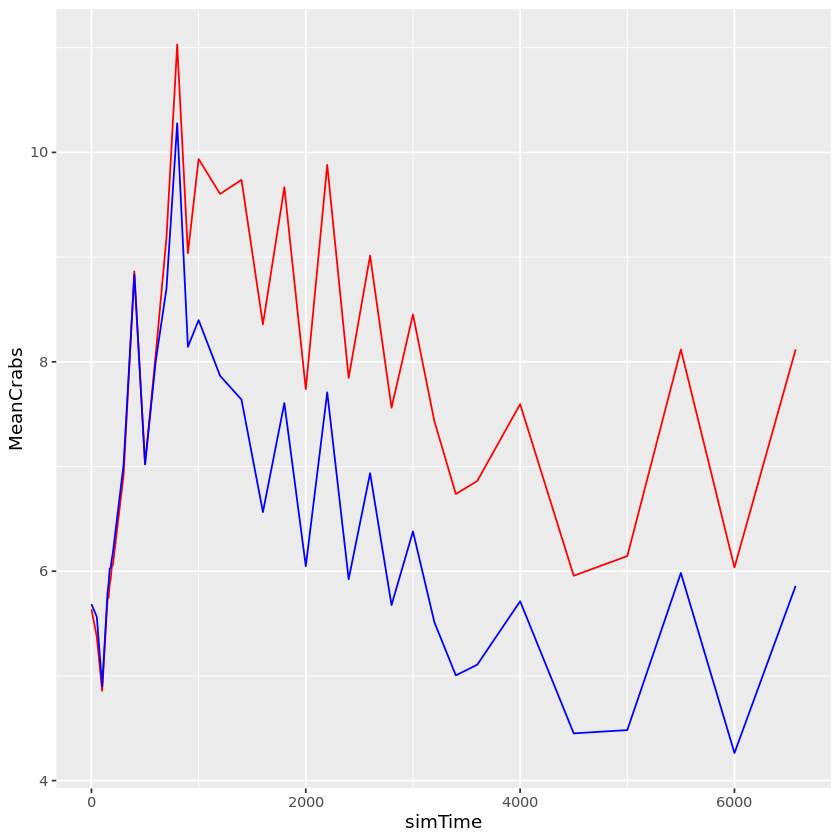

In [14]:
ggplot(cc_10000[[2]]) + geom_line(aes(x = simTime, y = MeanCrabs), col = "red") + 
    geom_line(data = normal_10000[[2]], aes(x = simTime, y = MeanCrabs), col = "blue")

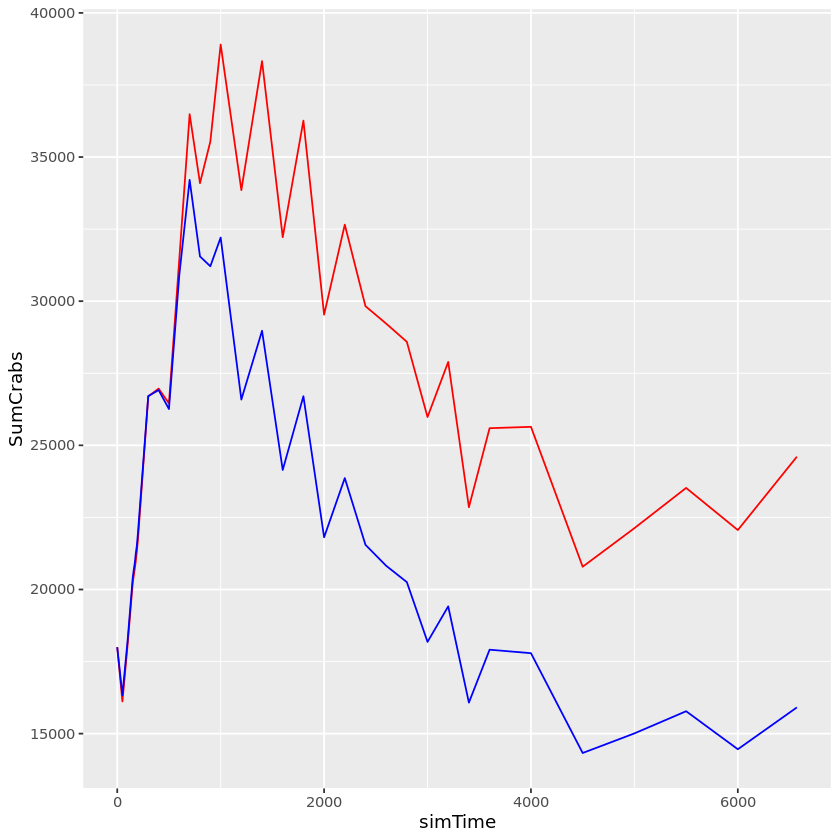

In [11]:
ggplot(cc_10000[[2]]) + geom_line(aes(x = simTime, y = SumCrabs), col = "red") + 
    geom_line(data = normal_10000[[2]], aes(x = simTime, y = SumCrabs), col = "blue")